In [1]:
import cv2
import numpy as np
import scipy.io
import os
import shutil

c:\Users\Administrator\miniconda3\envs\micelab\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
path = './geofeat/Cap-C973-basal.csv'
feat = np.genfromtxt(path, delimiter=",")

### Kmeans

In [35]:
from sklearn.cluster import KMeans

In [36]:
kmeans = KMeans(n_clusters=50, random_state=42).fit(feat)
labels = kmeans.labels_
print(labels.shape)

(10418,)


### UMAP+HDBSCAN

In [ ]:
import umap
import hdbscan
import matplotlib.pyplot as plt

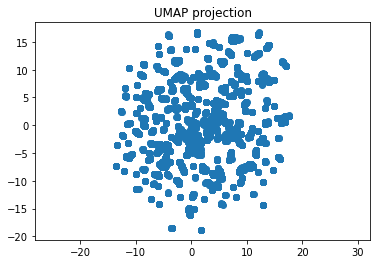

In [20]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(feat)

plt.scatter(embedding[:, 0], embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection')
plt.show()

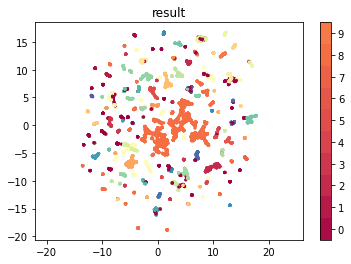

In [24]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=50,
).fit_predict(feat)
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('result')
plt.show()

### save cluster frame

In [12]:
def seg_img(vid_path, labels,out_path='./result'):
    '''
    save frame clusters to out_path by classes(labels)
    labels : n*1 labels
    '''
    for i in np.unique(labels):
        pathk = out_path+'/'+str(i)
        if not os.path.isdir(pathk):
            os.makedirs(pathk)

    cap = cv2.VideoCapture(vid_path)
    i=0
    labels = labels.squeeze()
    for lb in labels:
        i=i+1
        pathk = out_path+'/'+str(lb)+'/'
        ret, frame = cap.read()
        if not ret:
            break
        f= pathk+str(i)+'.jpg'
        cv2.imwrite(f, frame)
    

In [37]:
# labels = scipy.io.loadmat('./labels.mat')['labels'].T
vid_path = './vid/Cap-C973/basal_color.avi'
seg_img(vid_path, labels, './cluster_frames')

### Delete folder

In [33]:
shutil.rmtree('./cluster_frames')